# Proyección poblacional

Supongamos que nos encargamos de las políticas públicas de una estado o provincia y observamos el siguiente crecimiento poblacional.

In [1]:
from unicodedata import category

import numpy as np
import matplotlib.pyplot as plt

In [7]:
decada =    [0,1,2,3,4,5,6,7,8,9,10,11,12]
poblacion = [0.0525, 0.1365, 0.1535, 0.4079, 0.7291,
             0.9785, 1.3754, 1.5501, 1.825370, 1.8562,
              1.9137, 2.0484 , 1.9570] # en millones de personas

**Ejercicio** (2 puntos) Ahora grafica los datos anteriores. Sugerencia: usa un *scatter plot*.

[]

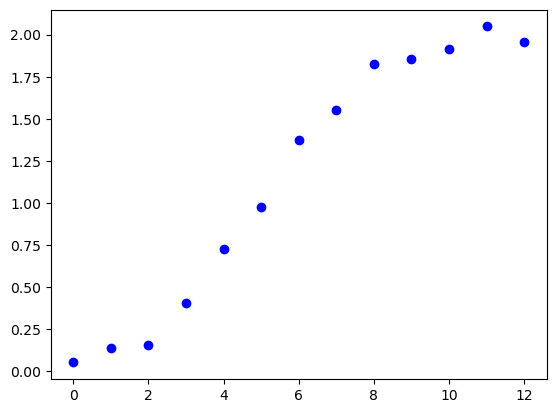

In [10]:
plt.scatter(decada, poblacion, color=['blue'])
plt.plot()

**Ejercicio** (2 puntos) Para predecir un comportamiento futuro muchas veces los matemáticos crean un *modelo* que sirve para simplificar el fenómeno y definirlo matemáticamente. Un modelo sencillo de crecimiento poblacional es la ecuación logística, la cual está dada por

$$ \sigma(t) = \frac{w_0}{1+e^{-w_1 (t + w_2)}}  $$

Implementa una función que calcule la función logística. Usa una entrada vectorial para los parámetros. La entrada también tiene que ser un array de Numpy. En este caso dejaremos fijo a $w_2$, ya que necesitamos que esté "centrado" entre los años 1900 y 2000.


**Ejercicio** (2 puntos). Selecciona valores cualesquiera para los parámetros y aplica la función logística a los años. Grafica el resultado junto con los datos reales.

Si no tiene sentido en que se ajuste, ¡es normal! Tenemos ya el modelo que tiene *parámetros*, es decir, valores que se pueden ir moviendo hasta que se ajusten a los datos, proceso que se conoce como ajuste paramétrico. Los parámetros aquí están representados por el vector $w$. Tenemos que modificarlo hasta que se ajuste. ¿Cómo hacemos eso? Podemos proceder a la optimización numérica.

Para optimizar, tenemos que saber qué es lo que vamos a optimizar. Así como en la vida, tenemos que saber a dónde vamos, en la optimización igual. ¿Qué queremos? Pues ajustar la curva. ¿Cómo lo lograremos? Definimos lo que queremos hacer, matemáticamente. ¿Qué significa ajustar la curva? Significa que la curva debe ser lo más cercano a nuestros puntos. Es decir, para cada dato etiquetado como $(t_i,y_i)$ donde $t$ es la variable del tiempo y $y$ la variable dependiente, tenemos que ser capaces de predecir el valor $y_i$ correcto o cercano utilizando $t_i$. Supongamos que nuestro modelo es $\sigma(t)$, que representa a la función sigmoide, entonces el error de aproximación para cada dato puede medirse como $|\sigma(t_i)-y_i|$, es decir, simplemente restar el valor absoluto. Resulta que, debido a que esa función es no diferenciable, necesitamos hacer $(\sigma(t_i)-y_i)^2$, que es casi lo mismo. Ahora hacemos todo para cada punto:

$$ \sum_{i=1}^{n} (\sigma(t_i)-y_i)^2 $$

Se suele dividir entre $n$ el resultado, lo cual no aporta mucho salvo controlar el tamaño de los números.

$$ \frac{1}{n} \sum_{i=1}^{n} (\sigma(t_i)-y_i)^2 $$

La función de aproximación $\sigma$ suele tener parámetros, de lo contrario, no podemos optimizar. Entonces la definimos como $\sigma_w (t)$ lo que significa que la función cambia según sus parámetros. Lo que tenemos que mover son los parámetros, por lo que la función de costo es una función de los parámetros y se representa así:

$$ \mathcal{L}(w) =  \frac{1}{n} \sum_{i=1}^{n} (\sigma(t_i)-y_i)^2 $$

Tenemos que hallar la mejor combinación $w$ que hace mínimo $$\mathcal{L}(w)$$. Ahora sí podemos hacer optimización.

**Ejercicio** (2 puntos): Implementa la función de costo $\mathcal{L}$ y calcula el costo de tu elección de $w$.

**Ejercicio** (2 puntos): Implementa Descenso de Gradiente para la función de costo. Puedes usar el código que fue proporcionado previamente.

In [ ]:
def parcial(f,i,v):
  h = 0.00000001
  v_2 = v.copy()
  v_2[i] += h
  diff = (f(v_2,decada,poblacion) - f(v,decada,poblacion)) / h
  return diff

In [ ]:
def gradiente(f,v):
  grad = []
  for i in range(len(v)):
    grad.append(parcial(f,i,v))
  return np.array(grad)

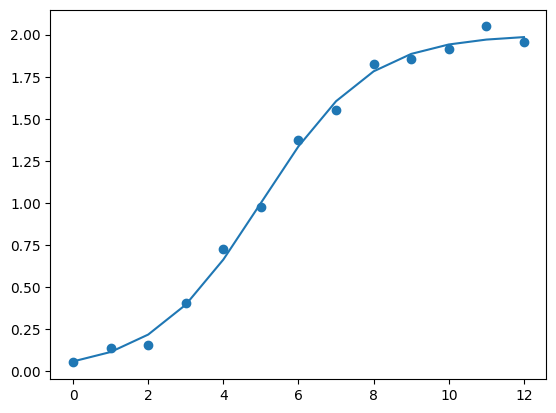

**Tres puntos extras:** A quien tenga la mejor marca.

**Pregunta:** ¿Cuál es la proyección poblacional en cinco décadas (lo que dura tu gestión)? ¿Cuál es la población máxima que se puede alcanzar de acuerdo con este modelo?